In [1]:
import bayes

# 准备数据:从文本中构建词向量

In [2]:
listOPosts, listClasses = bayes.loadDataSet()
myVocabList = bayes.createVocabList(listOPosts)
print(myVocabList)
testVector = bayes.setOfWords2Vec(myVocabList, listOPosts[0])
print(testVector)

['how', 'cute', 'love', 'take', 'has', 'flea', 'so', 'ate', 'maybe', 'him', 'help', 'food', 'my', 'garbage', 'licks', 'is', 'not', 'buying', 'park', 'I', 'dalmation', 'quit', 'please', 'problems', 'stupid', 'posting', 'worthless', 'mr', 'steak', 'dog', 'to', 'stop']
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]


# 训练算法:从词向量计算概率

# $p(c_i|w) = \frac{p(c_i|w)p(c_i)}{p(w)}$

In [3]:
trainMat = []
for postinDoc in listOPosts:
    trainMat.append(bayes.setOfWords2Vec(myVocabList, postinDoc))
print(trainMat)

[[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]]


In [5]:
print(listClasses)

[0, 1, 0, 1, 0, 1]


In [6]:
p0V, p1V, pAb = bayes.trainNB0(trainMat, listClasses)

[ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
8.0
[ 0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
13.0
[ 0.  1.  1.  2.  0.  0.  1.  2.  1.  1.  0.  0.  1.  0.  1.  3.  0.  0.
  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.]
19.0


In [6]:
print(p0V)

[ 0.125       0.          0.04166667  0.04166667  0.04166667  0.
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.          0.04166667  0.04166667
  0.04166667  0.          0.04166667  0.          0.04166667  0.08333333
  0.          0.          0.04166667  0.          0.04166667  0.          0.
  0.        ]


In [7]:
print(p1V)

[ 0.          0.05263158  0.          0.          0.          0.05263158
  0.05263158  0.          0.          0.          0.          0.          0.
  0.10526316  0.05263158  0.15789474  0.          0.          0.
  0.05263158  0.          0.05263158  0.          0.05263158  0.05263158
  0.05263158  0.          0.05263158  0.          0.05263158  0.05263158
  0.10526316]


# 测试算法：根据现实情况修改分类器

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


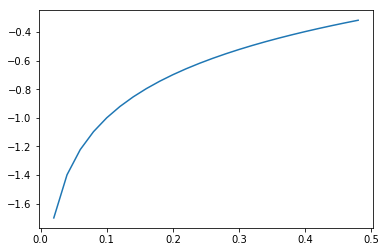

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

x = np.arange(0.0, 0.5, 0.02)
y1 = np.log10(x)

plt.figure()
plt.subplot(111)
plt.plot(x, y1)

In [5]:
bayes.testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


In [7]:
testEntry = ['love', 'my', 'dalmation']
thisDoc = array(bayes.setOfWords2Vec(myVocabList, testEntry))
print(thisDoc)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


# 测试算法：使用朴素贝叶斯进行交叉验证，分类器的修正在第七章会有

In [5]:
#随机抽取10个做测试集，因此每次训练结果不同
bayes.spamTest()

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2


D:\anaconda\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


## 绘制交叉验证错误率图像

In [2]:
import numpy as np

k = 1
i = 0
errors = []
xylabel = np.zeros((10,2))
while(k <= 10):
    a = bayes.spamTest()
    errors.append(a)
    xylabel[i] = np.tile([k, a],(1,1))
    print(xylabel[i])
    i += 1
    k += 1
print(k)

D:\anaconda\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
the error rate is:  0.1
[ 1.   0.1]
the error rate is:  0.0
[ 2.  0.]
classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code'

In [6]:
print('average errorRate is :', sum(errors)/len(errors))

average errorRate is : 0.08


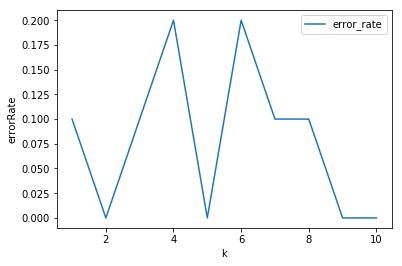

In [3]:
import matplotlib.pyplot as plt

y1, y2 = xylabel[:,0], xylabel[:,1]
plt.plot(y1, y2, label='error_rate')
plt.xlabel('k')
plt.ylabel('errorRate')
plt.legend()
plt.show()

# 从个人广告中获取区域倾向

## 1.数据收集：导入RSS源

In [3]:
import feedparser
ny = feedparser.parse('https://newyork.craigslist.org/search/stp?format=rss')
sf = feedparser.parse('https://sfbay.craigslist.org/search/stp?format=rss')

In [8]:
vocabList, pSF, pNY = bayes.localWords(ny, sf)

the error rate is:  0.25


D:\anaconda\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
